<a href="https://colab.research.google.com/github/Leonardorochagit/Geracao_Energia/blob/main/Previsao_GeracaoEnergia_AM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>Universidade do Estado do Amazonas</center>
###  <center>Escola Superior de Tecnologia</center>
#####  <center>Pós-graduação Lato Sensu em Ciência de Dados</center>
#####  <center>Programação para Ciência de Dados (Turma 02)</center>
---
## <center>TCC de Conclusão de Curso </center>
## <center> Previsão de Geração de Energia: Amazonas </center>


## **1. Importação das Bibliotecas e Configurações Ambiente**



In [10]:
!pip install pmdarima

     |████████████████████████████████| 1.4 MB 5.1 MB/s 
     |████████████████████████████████| 9.8 MB 16.2 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [11]:
#  !pip install sweetviz -q
#  !pip install -U pandas-profiling
#  !pip install --user -q datascience

In [4]:
! git clone https://github.com/Leonardorochagit/Geracao_Energia
%cd /content/Geracao_Energia/Base_ONS

Cloning into 'Geracao_Energia'...
remote: Enumerating objects: 90, done.
remote: Counting objects: 100% (90/90), done.
remote: Compressing objects: 100% (74/74), done.
remote: Total 90 (delta 40), reused 35 (delta 13), pack-reused 0
Unpacking objects: 100% (90/90), done.
Checking out files: 100% (41/41), done.
/content/Geracao_Energia/Base_ONS


In [12]:
import numpy as np
import pandas as pd
from pandas import Grouper 
from pandas import DataFrame
from datetime import datetime

#ARIMA

from pmdarima.arima import auto_arima
#Stats Models 
from statsmodels.tsa.filters.hp_filter import hpfilter
from statsmodels.tsa.seasonal import seasonal_decompose

#Graficos 
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import pyplot
import seaborn as sns 
import warnings
plt.style.use('seaborn')
warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"] = (15,15)
%matplotlib inline 

In [13]:
# palette -> Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r
sns.set_palette("Blues_r")

# style -> white, dark, whitegrid, darkgrid, ticks
sns.set_style("darkgrid")

In [14]:
pd.options.display.max_columns = None

## **2. Abrindo a Base de Dados** 

In [15]:
# Convertendo o dataset em um dataframe com Pandas
df_original = pd.read_csv('/content/Geracao_Energia/Base_ONS/4. Simples_Geração_de_Energia_Dia_data AMAZONAS.csv', sep = ';', 
                 index_col=0, header=0, parse_dates=True, squeeze=True) # header=0, index_col=0, parse_dates=True, squeeze=True
df_original.head()    

,cod_aneel (tb_referenciacegusina (Usina)),cod_nucleoaneel (tb_referenciacegusina (Usina)),Data Dica,dsc_estado,id_subsistema,nom_tipousinasite,nom_usina2,Período Exibido GE,Selecione Tipo de GE Simp 4
Data Escala de Tempo 1 GE Simp 4,,,,,,,,,
2013-09-07 00:00:00,*,*,9/7/2013 0:00,AMAZONAS,Norte,*,*,5,"0,56682"
2013-09-07 01:00:00,*,*,9/7/2013 1:00,AMAZONAS,Norte,*,*,5,"0,73739"
2013-09-07 02:00:00,*,*,9/7/2013 2:00,AMAZONAS,Norte,*,*,5,"0,74197"
2013-09-07 03:00:00,*,*,9/7/2013 3:00,AMAZONAS,Norte,*,*,5,"0,73323"
2013-09-07 04:00:00,*,*,9/7/2013 4:00,AMAZONAS,Norte,*,*,5,"0,79895"


In [170]:
df_original.columns


Index(['cod_aneel (tb_referenciacegusina (Usina))',
       'cod_nucleoaneel (tb_referenciacegusina (Usina))', 'Data Dica',
       'dsc_estado', 'id_subsistema', 'nom_tipousinasite', 'nom_usina2',
       'Período Exibido GE', 'Selecione Tipo de GE Simp 4'],
      dtype='object')

In [171]:
lista_colunas_drop = ['cod_aneel (tb_referenciacegusina (Usina))', 'cod_nucleoaneel (tb_referenciacegusina (Usina))', 
                      'Data Dica','dsc_estado', 'id_subsistema', 'nom_tipousinasite', 'nom_usina2', 
                      'Período Exibido GE']
df=df_original.drop(columns=lista_colunas_drop)
df

,Selecione Tipo de GE Simp 4
Data Escala de Tempo 1 GE Simp 4,
2013-09-07 00:00:00,"0,56682"
2013-09-07 01:00:00,"0,73739"
2013-09-07 02:00:00,"0,74197"
2013-09-07 03:00:00,"0,73323"
2013-09-07 04:00:00,"0,79895"
...,...
2022-01-17 19:00:00,"0,741464"
2022-01-17 20:00:00,"0,740971"
2022-01-17 21:00:00,"0,74189"


In [172]:
df = df.rename(columns={'Data Escala de Tempo 1 GE Simp 4':'Data/Hora','Selecione Tipo de GE Simp 4':'Geracao_(GWh)'})
#df = df.reset_index(drop=True)
df.head(10)

,Geracao_(GWh)
Data Escala de Tempo 1 GE Simp 4,
2013-09-07 00:00:00,"0,56682"
2013-09-07 01:00:00,"0,73739"
2013-09-07 02:00:00,"0,74197"
2013-09-07 03:00:00,"0,73323"
2013-09-07 04:00:00,"0,79895"
2013-09-07 05:00:00,"0,79833"
2013-09-07 06:00:00,"0,80018"
2013-09-07 07:00:00,"0,79931"
2013-09-07 08:00:00,"0,79672"


In [173]:
df.index.names = ['Data/Hora']
df['Geracao_(GWh)']=df['Geracao_(GWh)'].apply(lambda x: str(x).replace(',','.'))
df['Geracao_(GWh)']=df['Geracao_(GWh)'].astype('float64')
df

,Geracao_(GWh)
Data/Hora,
2013-09-07 00:00:00,0.566820
2013-09-07 01:00:00,0.737390
2013-09-07 02:00:00,0.741970
2013-09-07 03:00:00,0.733230
2013-09-07 04:00:00,0.798950
...,...
2022-01-17 19:00:00,0.741464
2022-01-17 20:00:00,0.740971
2022-01-17 21:00:00,0.741890


In [174]:
df.describe()

,Geracao_(GWh)
count,74514.000000
mean,0.858840
std,0.217121
min,0.023331
25%,0.695722
50%,0.859378
75%,1.027196
max,1.296660


In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 74514 entries, 2013-09-07 00:00:00 to 2022-01-17 23:00:00
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Geracao_(GWh)  74514 non-null  float64
dtypes: float64(1)
memory usage: 3.6 MB


In [176]:
df.index

DatetimeIndex(['2013-09-07 00:00:00', '2013-09-07 01:00:00',
               '2013-09-07 02:00:00', '2013-09-07 03:00:00',
               '2013-09-07 04:00:00', '2013-09-07 05:00:00',
               '2013-09-07 06:00:00', '2013-09-07 07:00:00',
               '2013-09-07 08:00:00', '2013-09-07 09:00:00',
               ...
               '2022-01-17 14:00:00', '2022-01-17 15:00:00',
               '2022-01-17 16:00:00', '2022-01-17 17:00:00',
               '2022-01-17 18:00:00', '2022-01-17 19:00:00',
               '2022-01-17 20:00:00', '2022-01-17 21:00:00',
               '2022-01-17 22:00:00', '2022-01-17 23:00:00'],
              dtype='datetime64[ns]', name='Data/Hora', length=74514, freq=None)

In [177]:
df['year'] = df.index.year
df['month']  = df.index.month
df['weekday'] = df.index.weekday
df['weekofyear'] = df.index.weekofyear
df['quarter'] = df.index.quarter
df.tail(3)

,Geracao_(GWh),year,month,weekday,weekofyear,quarter
Data/Hora,,,,,,
2022-01-17 21:00:00,0.741890,2022,1,0,3,1
2022-01-17 22:00:00,0.739852,2022,1,0,3,1
2022-01-17 23:00:00,0.740491,2022,1,0,3,1


In [178]:
df3 = df.iloc[:,0:2]
df3

,Geracao_(GWh),year
Data/Hora,,
2013-09-07 00:00:00,0.566820,2013
2013-09-07 01:00:00,0.737390,2013
2013-09-07 02:00:00,0.741970,2013
2013-09-07 03:00:00,0.733230,2013
2013-09-07 04:00:00,0.798950,2013
...,...,...
2022-01-17 19:00:00,0.741464,2022
2022-01-17 20:00:00,0.740971,2022
2022-01-17 21:00:00,0.741890,2022


In [179]:
df_ano = df3.set_index('year')
df_ano

,Geracao_(GWh)
year,
2013,0.566820
2013,0.737390
2013,0.741970
2013,0.733230
2013,0.798950
...,...
2022,0.741464
2022,0.740971
2022,0.741890


In [129]:
#df_ano=df6.resample('A').sum()
#df_ano

In [180]:
df.head()

,Geracao_(GWh),year,month,weekday,weekofyear,quarter
Data/Hora,,,,,,
2013-09-07 00:00:00,0.56682,2013,9,5,36,3
2013-09-07 01:00:00,0.73739,2013,9,5,36,3
2013-09-07 02:00:00,0.74197,2013,9,5,36,3
2013-09-07 03:00:00,0.73323,2013,9,5,36,3
2013-09-07 04:00:00,0.79895,2013,9,5,36,3


In [181]:
time_series = df['Geracao_(GWh)']
time_series

Data/Hora
2013-09-07 00:00:00    0.566820
2013-09-07 01:00:00    0.737390
2013-09-07 02:00:00    0.741970
2013-09-07 03:00:00    0.733230
2013-09-07 04:00:00    0.798950
                         ...   
2022-01-17 19:00:00    0.741464
2022-01-17 20:00:00    0.740971
2022-01-17 21:00:00    0.741890
2022-01-17 22:00:00    0.739852
2022-01-17 23:00:00    0.740491
Name: Geracao_(GWh), Length: 74514, dtype: float64

In [182]:
series=time_series.squeeze ()

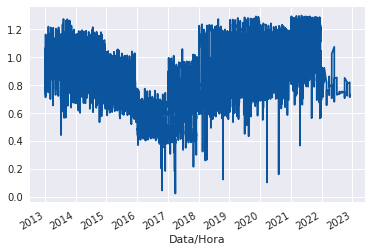

In [183]:
# Convert values to float from str
for i in range(0,len(series)):
    time_series[i] = float(series[i])
# Printing out first 5 values of dataset
series.head()

# # Plotting the dataset
series.plot()
pyplot.show()

In [102]:
import datetime as dt 

In [184]:
df

,Geracao_(GWh),year,month,weekday,weekofyear,quarter
Data/Hora,,,,,,
2013-09-07 00:00:00,0.566820,2013,9,5,36,3
2013-09-07 01:00:00,0.737390,2013,9,5,36,3
2013-09-07 02:00:00,0.741970,2013,9,5,36,3
2013-09-07 03:00:00,0.733230,2013,9,5,36,3
2013-09-07 04:00:00,0.798950,2013,9,5,36,3
...,...,...,...,...,...,...
2022-01-17 19:00:00,0.741464,2022,1,0,3,1
2022-01-17 20:00:00,0.740971,2022,1,0,3,1
2022-01-17 21:00:00,0.741890,2022,1,0,3,1


In [185]:
df8=df.copy()
df8.head()

,Geracao_(GWh),year,month,weekday,weekofyear,quarter
Data/Hora,,,,,,
2013-09-07 00:00:00,0.56682,2013,9,5,36,3
2013-09-07 01:00:00,0.73739,2013,9,5,36,3
2013-09-07 02:00:00,0.74197,2013,9,5,36,3
2013-09-07 03:00:00,0.73323,2013,9,5,36,3
2013-09-07 04:00:00,0.79895,2013,9,5,36,3


In [186]:
df8['date']=df8.index.normalize()
df8['time']=df8.index.time.astype(str)
df8

,Geracao_(GWh),year,month,weekday,weekofyear,quarter,date,time
Data/Hora,,,,,,,,
2013-09-07 00:00:00,0.566820,2013,9,5,36,3,2013-09-07,00:00:00
2013-09-07 01:00:00,0.737390,2013,9,5,36,3,2013-09-07,01:00:00
2013-09-07 02:00:00,0.741970,2013,9,5,36,3,2013-09-07,02:00:00
2013-09-07 03:00:00,0.733230,2013,9,5,36,3,2013-09-07,03:00:00
2013-09-07 04:00:00,0.798950,2013,9,5,36,3,2013-09-07,04:00:00
...,...,...,...,...,...,...,...,...
2022-01-17 19:00:00,0.741464,2022,1,0,3,1,2022-01-17,19:00:00
2022-01-17 20:00:00,0.740971,2022,1,0,3,1,2022-01-17,20:00:00
2022-01-17 21:00:00,0.741890,2022,1,0,3,1,2022-01-17,21:00:00


In [187]:
del df8['year']
del df8['month']
del df8['weekday']
del df8['weekofyear']
del df8['quarter']
df8

,Geracao_(GWh),date,time
Data/Hora,,,
2013-09-07 00:00:00,0.566820,2013-09-07,00:00:00
2013-09-07 01:00:00,0.737390,2013-09-07,01:00:00
2013-09-07 02:00:00,0.741970,2013-09-07,02:00:00
2013-09-07 03:00:00,0.733230,2013-09-07,03:00:00
2013-09-07 04:00:00,0.798950,2013-09-07,04:00:00
...,...,...,...
2022-01-17 19:00:00,0.741464,2022-01-17,19:00:00
2022-01-17 20:00:00,0.740971,2022-01-17,20:00:00
2022-01-17 21:00:00,0.741890,2022-01-17,21:00:00


In [188]:
df_pivot=df8.pivot(index='date', columns ='time', values='Geracao_(GWh)')
df_pivot


time,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,08:00:00,09:00:00,10:00:00,11:00:00,12:00:00,13:00:00,14:00:00,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00
date,,,,,,,,,,,,,,,,,,,,,,,,
2013-01-08,1.043050,1.007990,0.956080,0.925520,0.890290,0.869180,0.834700,0.777050,0.819490,0.914260,0.960300,0.996930,0.994100,1.019690,1.053670,1.057140,1.055030,1.057560,1.015780,1.022700,1.058350,1.065040,1.064010,1.056990
2013-01-09,0.940450,0.910590,0.876000,0.861970,0.814690,0.817140,0.763990,0.728110,0.718460,0.723110,0.711170,0.720230,0.726780,0.722030,0.734640,0.776590,0.800250,0.823050,0.877910,0.956820,0.994940,0.993970,1.001900,0.996580
2013-01-10,0.962540,0.923770,0.896280,0.887340,0.871520,0.858400,0.834740,0.768070,0.829180,0.906050,0.959630,0.982730,1.001300,1.035480,1.103200,1.161520,1.161150,1.139590,1.030670,1.076940,1.119150,1.122390,1.123640,1.124790
2013-01-11,1.094580,1.072280,1.020000,0.992110,0.965630,0.949650,0.905420,0.882490,0.834670,0.909220,0.954540,0.949980,0.934060,0.875310,0.871640,0.895860,0.934170,0.906930,0.890880,0.891900,0.978240,1.002010,0.988650,0.978110
2013-01-12,0.994950,0.994190,0.974870,0.942400,0.921110,0.883130,0.886940,0.857920,0.787770,0.777730,0.761700,0.747380,0.728480,0.728030,0.742940,0.747450,0.744270,0.788890,0.813400,0.805820,0.876420,0.921710,0.964660,0.960080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-01,0.738283,0.738562,0.738058,0.736472,0.742949,0.736495,0.740539,0.740741,0.741732,0.740428,0.736836,0.735041,0.738916,0.740512,0.740208,0.740083,0.739636,0.743334,0.749110,0.752813,0.749328,0.750995,0.751498,0.746601
2022-09-01,0.746364,0.745948,0.744973,0.745316,0.747620,0.745234,0.748202,0.743145,0.750549,0.752173,0.753674,0.748561,0.751089,0.747693,0.747902,0.750557,0.749902,0.748850,0.749008,0.749168,0.749056,0.749416,0.751463,0.751119
2022-10-01,0.751420,0.748997,0.752034,0.752748,0.750807,0.750368,0.750400,0.733885,0.732186,0.727511,0.719938,0.705826,0.716981,0.723935,0.775823,0.800435,0.792947,0.797520,0.804395,0.808974,0.804461,0.806813,0.838413,0.850455


Text(0.5, 1.0, 'Geração de Energia no Amazonas ')

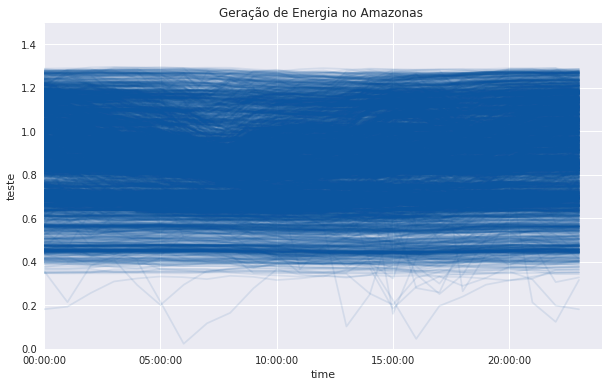

In [189]:
fig, ax = plt.subplots(1,1,figsize=(10,6))
df_pivot.T.plot(ax=ax, color='C0', alpha=0.1, legend=False) # alpha=0.1, 
ax.set_xlim([0,24])
ax.set_ylim(0,1.5)
ax.set_ylabel('teste') #$"C$
ax.set_title('Geração de Energia no Amazonas ')#$ (df):

In [192]:
df_pivot_day=df_pivot.groupby(Grouper(freq='D'))
df_pivot_day.head()

time,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,08:00:00,09:00:00,10:00:00,11:00:00,12:00:00,13:00:00,14:00:00,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00
date,,,,,,,,,,,,,,,,,,,,,,,,
2013-01-08,1.043050,1.007990,0.956080,0.925520,0.890290,0.869180,0.834700,0.777050,0.819490,0.914260,0.960300,0.996930,0.994100,1.019690,1.053670,1.057140,1.055030,1.057560,1.015780,1.022700,1.058350,1.065040,1.064010,1.056990
2013-01-09,0.940450,0.910590,0.876000,0.861970,0.814690,0.817140,0.763990,0.728110,0.718460,0.723110,0.711170,0.720230,0.726780,0.722030,0.734640,0.776590,0.800250,0.823050,0.877910,0.956820,0.994940,0.993970,1.001900,0.996580
2013-01-10,0.962540,0.923770,0.896280,0.887340,0.871520,0.858400,0.834740,0.768070,0.829180,0.906050,0.959630,0.982730,1.001300,1.035480,1.103200,1.161520,1.161150,1.139590,1.030670,1.076940,1.119150,1.122390,1.123640,1.124790
2013-01-11,1.094580,1.072280,1.020000,0.992110,0.965630,0.949650,0.905420,0.882490,0.834670,0.909220,0.954540,0.949980,0.934060,0.875310,0.871640,0.895860,0.934170,0.906930,0.890880,0.891900,0.978240,1.002010,0.988650,0.978110
2013-01-12,0.994950,0.994190,0.974870,0.942400,0.921110,0.883130,0.886940,0.857920,0.787770,0.777730,0.761700,0.747380,0.728480,0.728030,0.742940,0.747450,0.744270,0.788890,0.813400,0.805820,0.876420,0.921710,0.964660,0.960080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-01,0.738283,0.738562,0.738058,0.736472,0.742949,0.736495,0.740539,0.740741,0.741732,0.740428,0.736836,0.735041,0.738916,0.740512,0.740208,0.740083,0.739636,0.743334,0.749110,0.752813,0.749328,0.750995,0.751498,0.746601
2022-09-01,0.746364,0.745948,0.744973,0.745316,0.747620,0.745234,0.748202,0.743145,0.750549,0.752173,0.753674,0.748561,0.751089,0.747693,0.747902,0.750557,0.749902,0.748850,0.749008,0.749168,0.749056,0.749416,0.751463,0.751119
2022-10-01,0.751420,0.748997,0.752034,0.752748,0.750807,0.750368,0.750400,0.733885,0.732186,0.727511,0.719938,0.705826,0.716981,0.723935,0.775823,0.800435,0.792947,0.797520,0.804395,0.808974,0.804461,0.806813,0.838413,0.850455


KeyboardInterrupt: ignored

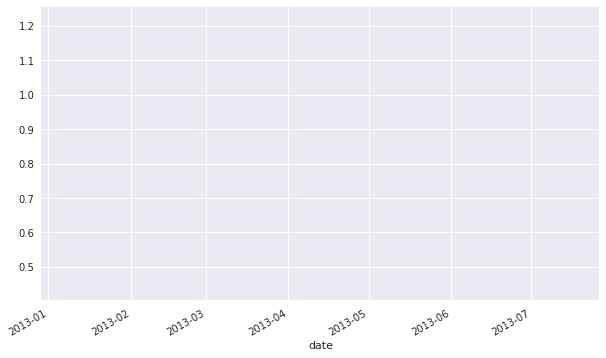

In [196]:
fig, ax = plt.subplots(1,1,figsize=(10,6))
df_pivot_day.plot(ax=ax, color='C0', alpha=0.1, legend=False) # alpha=0.1, 
ax.set_xlim([0,24])
ax.set_ylim(0,1.5)
ax.set_ylabel('teste') #$"C$
ax.set_title('Geração de Energia no Amazonas ')#$ (df):

In [ ]:
# day_colors ={'Monday': 'C0',
#              'Tuesday': 'C1',
#              'Wednesday': 'C1',
#              'Thursday': 'C1',
#              'Friday': 'C1',
#              'Satuday': 'C2',
#              'Sunday': 'C3'}

In [156]:
# fig, ax = plt.subplots(1,1,figsize=(10,6))
# for day_name, color in day_colors.items():
#   df_roll[df_roll.index.day_name() == day_name].T.plot(
#       ax=ax, color=color, alpha=0.1, legend=False)ax.set_xlim([0,24])
# ax.set_ylim(0,1.5)
# ax.set_ylabel('teste') #$"C$
# ax.set_title('Geração de Energia no Amazonas ')#$ (df):

SyntaxError: ignored

In [216]:
se=df8.copy()
se

,Geracao_(GWh),date,time
Data/Hora,,,
2013-09-07 00:00:00,0.566820,2013-09-07,00:00:00
2013-09-07 01:00:00,0.737390,2013-09-07,01:00:00
2013-09-07 02:00:00,0.741970,2013-09-07,02:00:00
2013-09-07 03:00:00,0.733230,2013-09-07,03:00:00
2013-09-07 04:00:00,0.798950,2013-09-07,04:00:00
...,...,...,...
2022-01-17 19:00:00,0.741464,2022-01-17,19:00:00
2022-01-17 20:00:00,0.740971,2022-01-17,20:00:00
2022-01-17 21:00:00,0.741890,2022-01-17,21:00:00


In [217]:
se.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 74514 entries, 2013-09-07 00:00:00 to 2022-01-17 23:00:00
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Geracao_(GWh)  74514 non-null  float64       
 1   date           74514 non-null  datetime64[ns]
 2   time           74514 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 4.8+ MB


In [218]:
# del se['date']
# del se['time']
# se

In [228]:

#https://machinelearningmastery.com/time-series-data-visualization-with-python/
# from pandas import read_csv
# from pandas import DataFrame
# series = read_csv('/content/Geracao_Energia/Base_ONS/4. Simples_Geração_de_Energia_Dia_data AMAZONAS.csv',sep=';', header=0, index_col=0, parse_dates=True, squeeze=True)
# groups = series.groupby(Grouper(freq='A'))
# years = DataFrame()
# for name, group in groups:
# 	years[name.year] = group.values
# years.plot(subplots=True, legend=False)
# pyplot.show()


## **3. Manipulando a Base de Dados** 

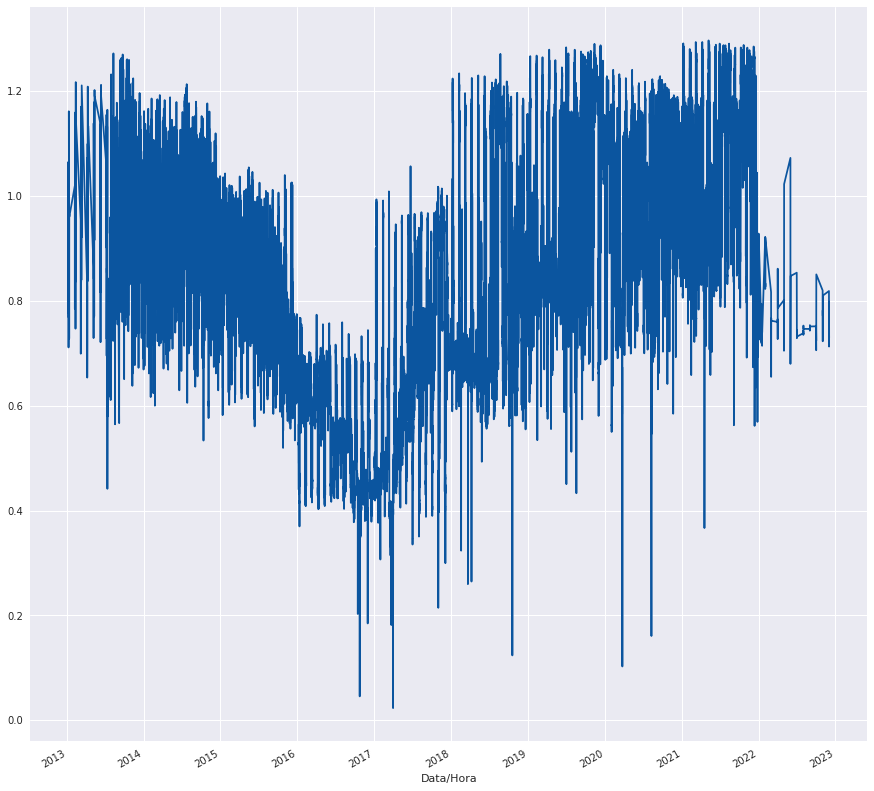

In [ ]:
df['Geracao_(GWh)'].plot()

In [ ]:
df.boxplot(by =df.index, column =['Geracao_(GWh)'], grid = False)

In [ ]:
df

In [ ]:
# Splitting the plot into (1,2) subplots
# and initializing them using fig and ax
# variables
fig, ax = plt.subplots(nrows=1, ncols=2,
                       figsize=(15, 6))
 
# Using Seaborn Library for Box Plot
sns.boxplot(df['Year'],
            df["A"], ax=ax[0])
 
# Defining the title and axes names
ax[0].set_title('Year-wise Box Plot for A',
                fontsize=20, loc='center')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('"A" values')
 
# Using Seaborn Library for Box Plot
sns.boxplot(dataframe['Month'],
            dataframe["A"], ax=ax[1])
 
# Defining the title and axes names
ax[1].set_title('Month-wise Box Plot for A',
                fontsize=20, loc='center')
ax[1].set_xlabel('Month')
ax[1].set_ylabel('"A" values')
 
# rotate the ticks and right align them
fig.autofmt_xdate()

In [ ]:
import seaborn as sns

In [ ]:
# from pandas import DataFrame
# years=DataFrame()
# for name, group in df1: 
#    years[name.year]=group.values
# years.boxplot
# pyplot.show()

In [ ]:
pd.date_range('2008-01-01', '2022-01-10', freq='M')

DatetimeIndex(['2008-01-31', '2008-02-29', '2008-03-31', '2008-04-30',
               '2008-05-31', '2008-06-30', '2008-07-31', '2008-08-31',
               '2008-09-30', '2008-10-31',
               ...
               '2021-03-31', '2021-04-30', '2021-05-31', '2021-06-30',
               '2021-07-31', '2021-08-31', '2021-09-30', '2021-10-31',
               '2021-11-30', '2021-12-31'],
              dtype='datetime64[ns]', length=168, freq='M')

In [ ]:
# Specify the data columns we want to include (i.e. exclude Year, Month, Weekday Name)
data_columns = ['Geracao_(GWh)']
# Resample to weekly frequency, aggregating with mean
df_ano = df1[data_columns].resample('Y').sum()
df_ano.head(15)

,Geracao_(GWh)
Data/Hora,
2013-12-31,4028.558318
2014-12-31,8193.022369
2015-12-31,7204.733258
2016-12-31,4756.022458
2017-12-31,5719.720343
2018-12-31,7160.904127
2019-12-31,8558.997862
2020-12-31,8789.920832
2021-12-31,9270.359634


In [ ]:
# years = DataFrame()
# for name, group in groups:
# 	years[name.year] = group.values
# years.boxplot()
# pyplot.show()

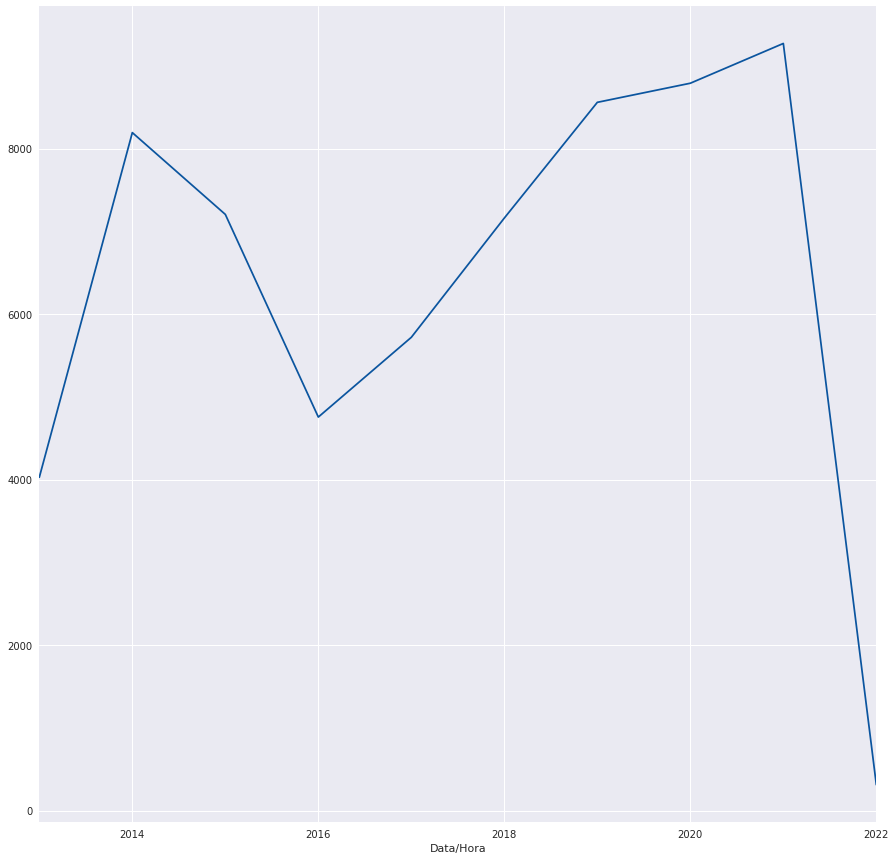

In [ ]:
df_ano['Geracao_(GWh)'].plot()

In [ ]:
df_ano

,Geracao_(GWh)
Data/Hora,
2013-12-31,4028.558318
2014-12-31,8193.022369
2015-12-31,7204.733258
2016-12-31,4756.022458
2017-12-31,5719.720343
2018-12-31,7160.904127
2019-12-31,8558.997862
2020-12-31,8789.920832
2021-12-31,9270.359634


In [ ]:
from pandas import read_csv
from pandas import DataFrame
from pandas import Grouper
from matplotlib import pyplot

In [ ]:
groups = df1.groupby(Grouper(freq='A'))
groups.head(10)

,Geracao_(GWh)
Data/Hora,
2013-01-08 00:00:00,1.043050
2013-01-08 01:00:00,1.007990
2013-01-08 02:00:00,0.956080
2013-01-08 03:00:00,0.925520
2013-01-08 04:00:00,0.890290
...,...
2022-01-01 05:00:00,0.865195
2022-01-01 06:00:00,0.808136
2022-01-01 07:00:00,0.773624


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


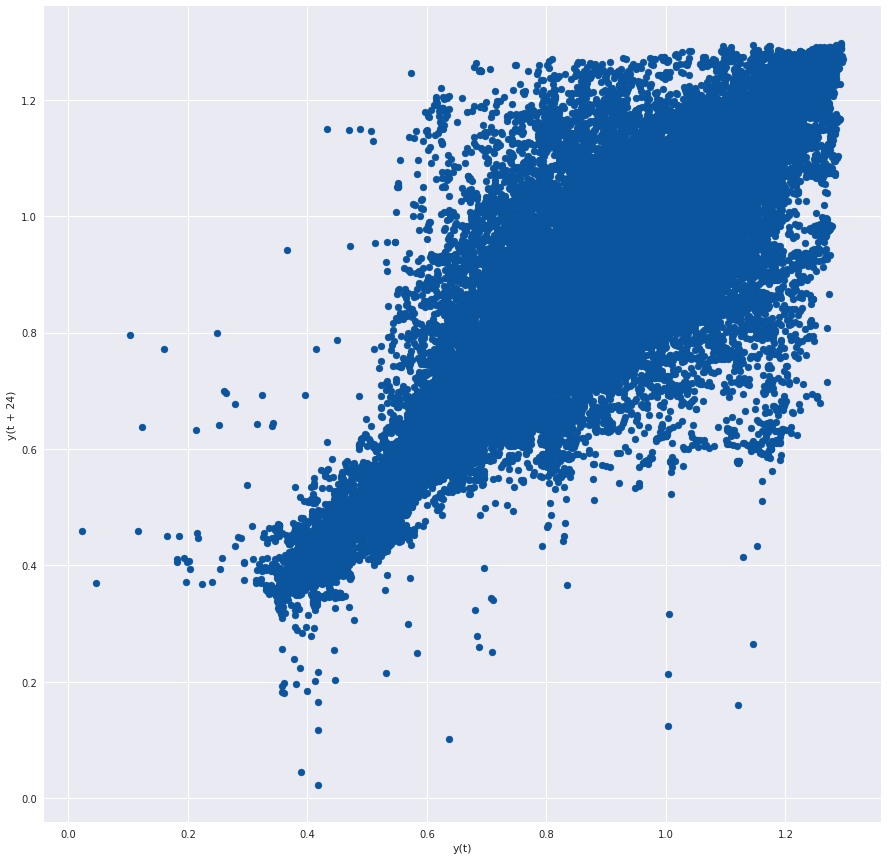

In [ ]:
#Try lag 1 day
pd.plotting.lag_plot(df['Geracao_(GWh)'], lag =24 )

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


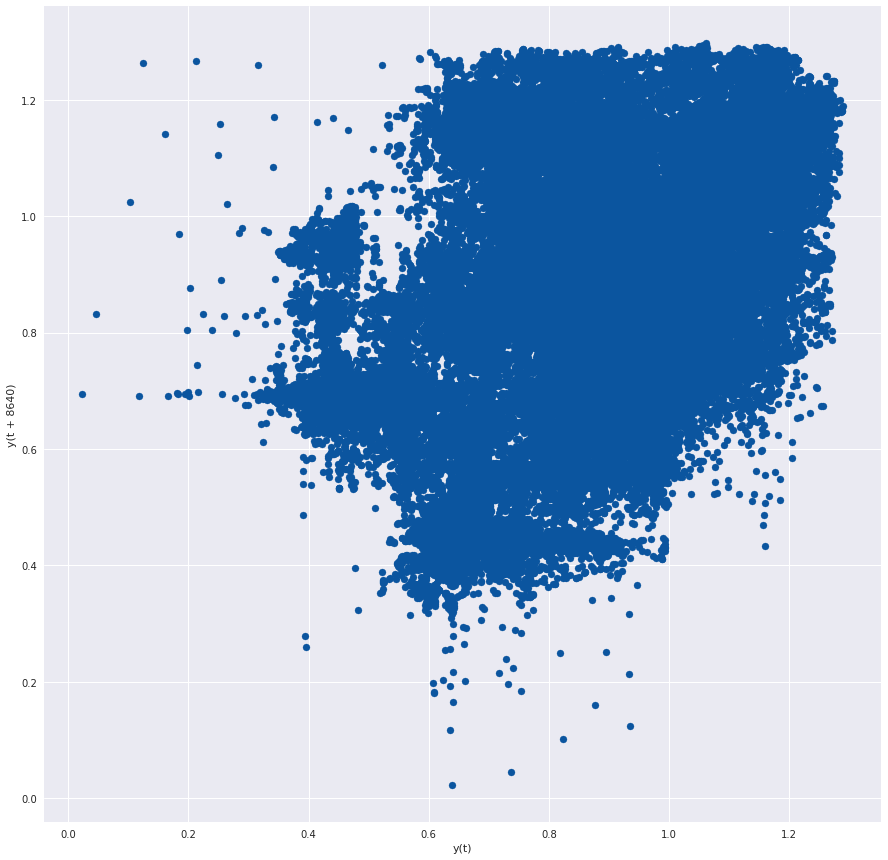

In [ ]:
#Try lag 365 day
pd.plotting.lag_plot(df['Geracao_(GWh)'], lag = 8640)

Auto-correlation Plots

In [ ]:
from pandas.plotting import autocorrelation_plot

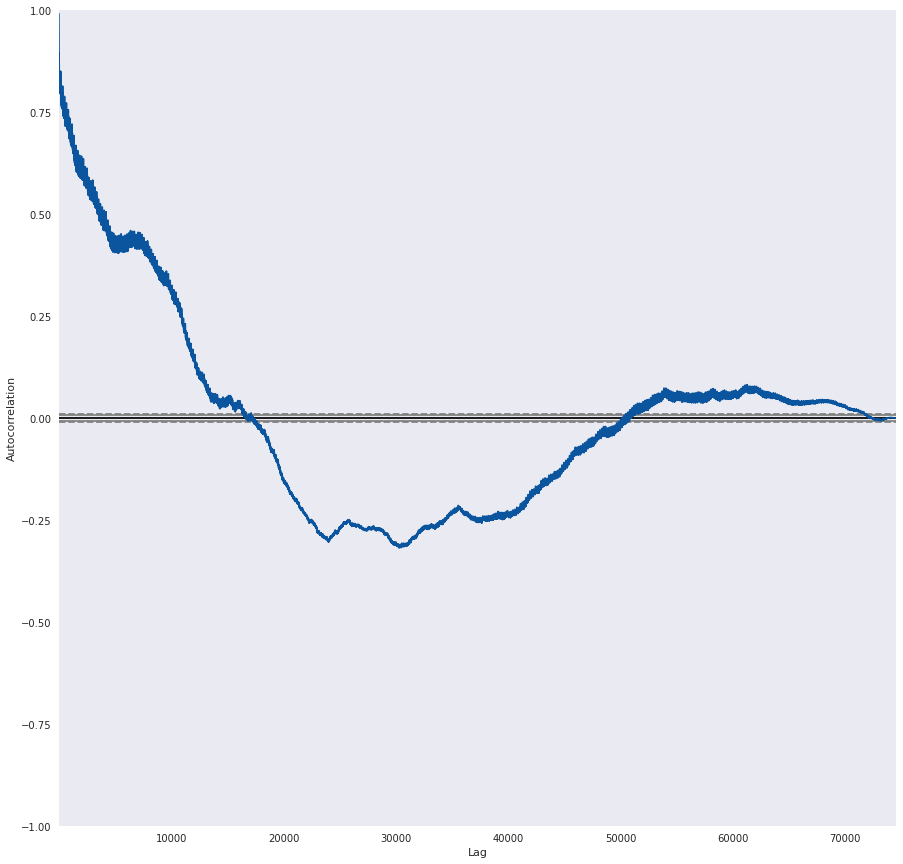

In [ ]:
autocorrelation_plot(df1)
pyplot.show()

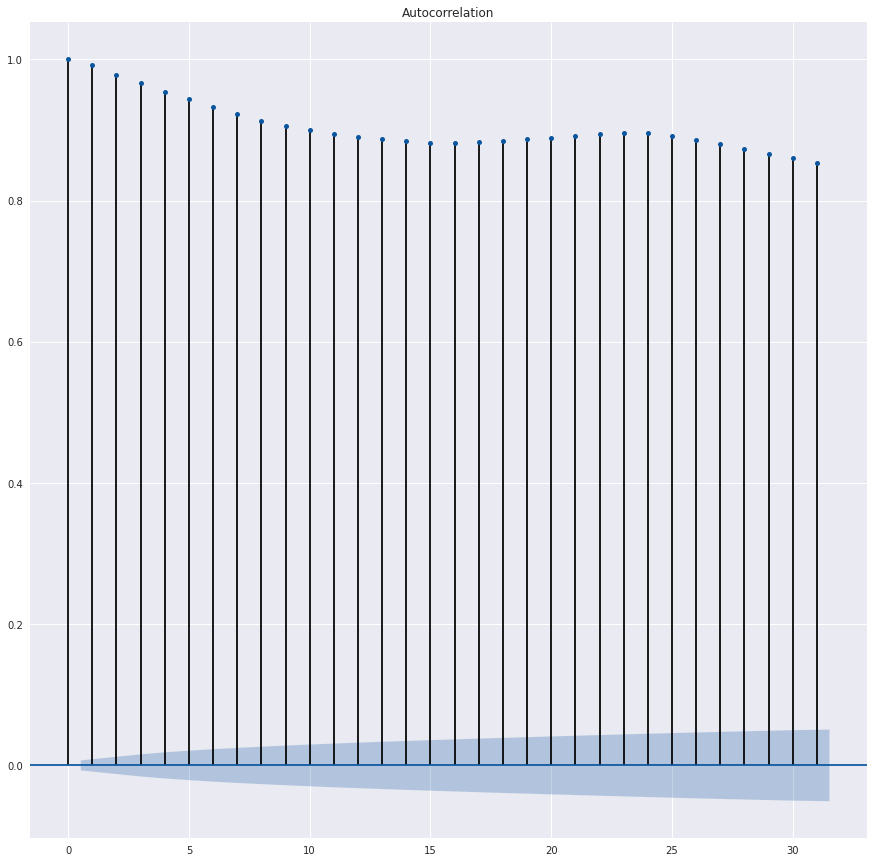

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df1, lags=31)
pyplot.show()

Partial Auto-Correlation

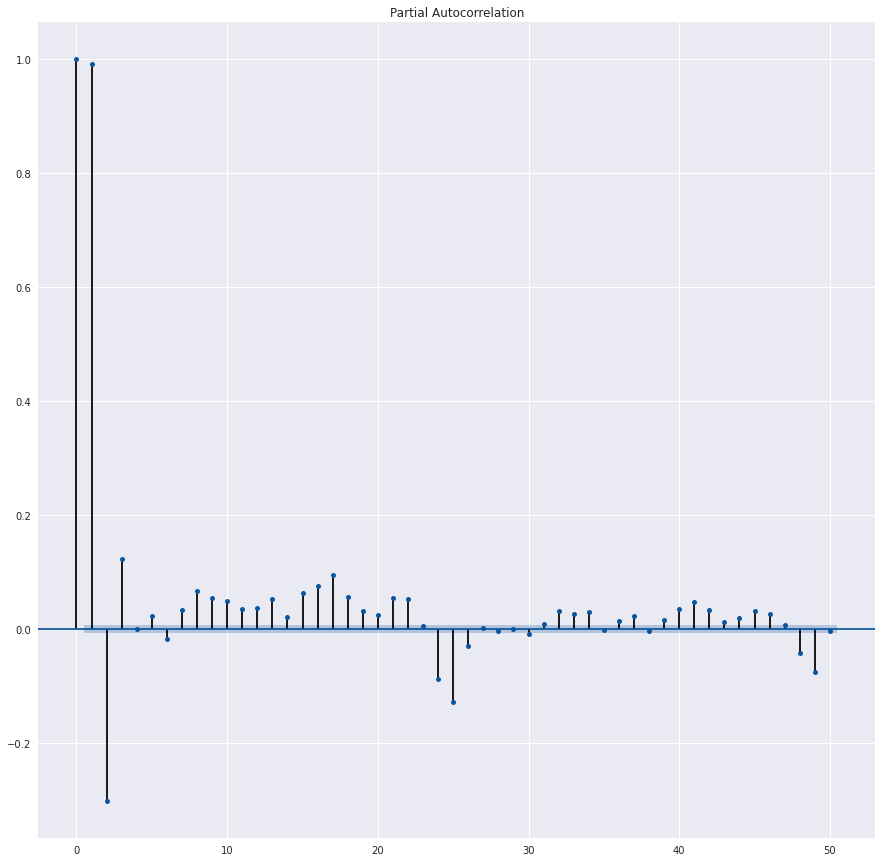

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df1, lags=50)
pyplot.show()

## **3. Normalizando** #

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import sklearn.preprocessing
from sklearn.metrics import r2_score

from keras.layers import Dense,Dropout,SimpleRNN,LSTM
from keras.models import Sequential

#check all the files in the input dataset
#print(os.listdir("../input/"))

In [ ]:
df

In [ ]:
temp = df.copy() # make temporary copy of dataframe
dataset = temp['Geracao_(GWh)'].values # numpy.ndarray of the actual load
dataset = dataset.astype('float32') 
dataset = np.reshape(dataset, (-1, 1)) # reshape to one feature; required for the models

#scaler = MinMaxScaler(feature_range=(0, 1)) # Min Max scaler
#dataset = scaler.fit_transform(dataset) # fit and transform the dataset

# Train and Test splits
train_size = int(len(dataset) * 0.80) 
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)
    
look_back = 25 # timesteps to lookback for predictions
X_train, trainY = create_dataset(train, look_back)
X_test, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))
print("Shapes: \nTraining set: {}, Testing set: {}".format(X_train.shape, X_test.shape))
print("Sample from training set: \n{}".format(X_train[0]))

Modelo de Demanda de Energia em Séries Temporais medição horaria
https://www.kaggle.com/varanr/hourly-energy-demand-time-series-forecast

##Models and their MAPE
Here we test various models and visualize their predictions. Models used are:

AutoRegressive
Moving Average
ARMA
ARIMA
LSTM

In [ ]:
from statsmodels.tsa.ar_model import AR

model = AR(train)
model_fit = model.fit()

##LSTM

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.4f' % x)
import seaborn as sns
sns.set_context("paper", font_scale=1.3)
sns.set_style('white')
import warnings
warnings.filterwarnings('ignore')
from time import time
import matplotlib.ticker as tkr
from scipy import stats
from statsmodels.tsa.stattools import adfuller
from sklearn import preprocessing
from statsmodels.tsa.stattools import pacf
%matplotlib inline
import math
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from keras.callbacks import EarlyStopping
# Any results you write to the current directory are saved as output.

In [ ]:
temp = df
dataset = temp['Geracao_(GWh)'].dropna().values #numpy.ndarray
dataset = dataset.astype('float32')
dataset = np.reshape(dataset, (-1, 1))
scaler = MinMaxScaler(feature_range=(0, 1)) # Min Max scaler
dataset = scaler.fit_transform(dataset)
train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)
    
look_back = 25
X_train, Y_train = create_dataset(train, look_back)
X_test, Y_test = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [ ]:
model = Sequential()
model.add(LSTM(100, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(X_train, Y_train, epochs=200, batch_size=70, validation_data=(X_test, Y_test),verbose=1, shuffle=False)

model.summary()

Epoch 1/200
852/852 [==============================] - 7s 5ms/step - loss: 0.0045 - val_loss: 0.0017
Epoch 2/200
852/852 [==============================] - 4s 5ms/step - loss: 0.0020 - val_loss: 0.0011
Epoch 3/200
852/852 [==============================] - 4s 5ms/step - loss: 0.0017 - val_loss: 0.0013
Epoch 4/200
852/852 [==============================] - 5s 6ms/step - loss: 0.0015 - val_loss: 8.9734e-04
Epoch 5/200
852/852 [==============================] - 4s 5ms/step - loss: 0.0013 - val_loss: 8.9457e-04
Epoch 6/200
852/852 [==============================] - 4s 5ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 7/200
852/852 [==============================] - 4s 5ms/step - loss: 0.0011 - val_loss: 7.9285e-04
Epoch 8/200
852/852 [==============================] - 4s 5ms/step - loss: 0.0010 - val_loss: 8.7694e-04
Epoch 9/200
852/852 [==============================] - 4s 5ms/step - loss: 9.3593e-04 - val_loss: 7.5076e-04
Epoch 10/200
852/852 [==============================] - 4s 5ms/step

In [ ]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
# invert predictions
train_predict = scaler.inverse_transform(train_predict)
Y_train = scaler.inverse_transform([Y_train])
test_predict = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform([Y_test])
print('Train Mean Absolute Error:', mean_absolute_error(Y_train[0], train_predict[:,0]))
print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_train[0], train_predict[:,0])))
print('Test Mean Absolute Error:', mean_absolute_error(Y_test[0], test_predict[:,0]))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_test[0], test_predict[:,0])))

Train Mean Absolute Error: 0.024555264739048305
Train Root Mean Squared Error: 0.03219040917804694
Test Mean Absolute Error: 0.018859342137248773
Test Root Mean Squared Error: 0.02885051735129767


In [ ]:
mape_train = np.mean(np.abs((Y_train[0] - train_predict[:,0]) / Y_train[0])) * 100
mape_test = np.mean(np.abs((Y_test[0] - test_predict[:,0]) / Y_test[0])) * 100

print("Train MAPE: {}, Test MAPE: {}".format(mape_train, mape_test))

Train MAPE: 3.5626286749782703, Test MAPE: 1.939265256789904


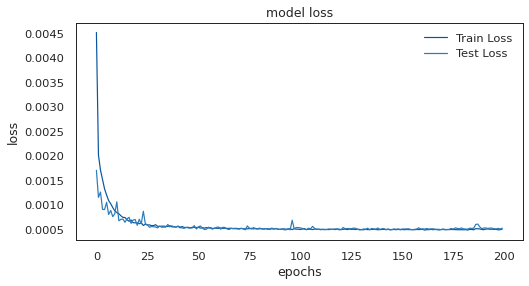

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();

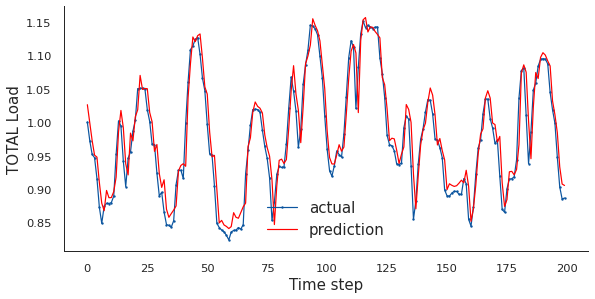

In [ ]:
idx = 200
aa=[x for x in range(idx)]
plt.figure(figsize=(8,4))
plt.plot(aa, Y_test[0][:idx], marker='.', label="actual")
plt.plot(aa, test_predict[:,0][:idx], 'r', label="prediction")
# plt.tick_params(left=False, labelleft=True) #remove ticks
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('TOTAL Load', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show();

## **Decomposiçao da Serie**

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
result = seasonal_decompose(df1, model='additive', freq=365)
result.plot()
pyplot.show()

# Teste

In [ ]:
df2=df[['Geracao_(GWh)',	'year']]
df2.head()

In [ ]:
df2.info

In [ ]:
df3= df2.groupby(['year']).sum()
df3.head()

In [ ]:
years = DataFrame()
for name, group in df3:
	years[name.year] = group.values
years.plot(subplots=True, legend=False)
pyplot.show()

In [ ]:
series1 = read_csv('/content/Geracao_Energia/Base_ONS/4. Simples_Geração_de_Energia_Dia_data AMAZONAS.csv', sep = ';', 
                 index_col=0, header=0, parse_dates=True, squeeze=True) # header=0, index_col=0, parse_dates=True, squeeze=True
   

In [ ]:
series2=series1[['Selecione Tipo de GE Simp 4']]
series2['Selecione Tipo de GE Simp 4']=series2['Selecione Tipo de GE Simp 4'].apply(lambda x: str(x).replace(',','.'))
series3=series2['Selecione Tipo de GE Simp 4'].astype('float64')
series3


In [ ]:
df2['2008':'2022'].plot(subplots=True, figsize=(10,12))
plt.title('Google stock attributes from 2008 to 2010')
plt.savefig('stocks.png')
plt.show()